### ISyE6669 HW07 - Graham Billey, Spring 2020

#### Problem 01 - LP geometry and basic feasible solution

(a) Consider the following linear program:

$$  min\ -2x_1 + 4x_2 $$
$$  s.t.\ x_1 + x_2 \leq\ 4 $$
$$  \quad -x_1 + x_2 \leq\ 2 $$
$$  \quad x_1 - x_2 \leq\ 2 $$
$$  \quad x_1 \geq 0, x_2 \geq 0. $$

Graph the constraints of this linear program, and indicate the feasible region.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from itertools import combinations

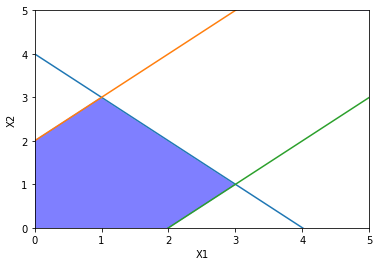

In [23]:
x = np.linspace(0, 5, 100)
b0 = np.zeros(len(x))
b1 = 4-x
b2 = 2+x
b3 = x-2

plt.plot(x, b1)
plt.plot(x, b2)
plt.plot(x, b3)
plt.xlim((0, 5))
plt.ylim((0, 5))
plt.xlabel('X1')
plt.ylabel('X2')

plt.fill_between(x, b3, b2, interpolate=True, color='blue', alpha=0.5)
plt.fill_between(x, b1, 5, color='white')
plt.plot(aspect='equal')
plt.show()

The feasible region is shown above in blue.

(b) Transform it into a standard form LP. Denote $  x = [x_1, x_2, x_3, x_4, x_5]^\top $ as the vector of variables, and use the standard form notation:
$$  \min c^\top x $$
$$  s.t.\ Ax = b $$
$$  x \geq 0, $$
specify $  c, A, b $ for the above problem.

$ \vec x = [x_1, x_2, x_3, x_4, x_5]^\top $

$ \vec c = [-2, 4, 0, 0, 0]^\top $

$ \vec b = [4, 2, 2]^\top $

$ A = \begin{bmatrix} 1 & 1 & 1 & 0 & 0 \\ -1 & 1 & 0 & 1 & 0 \\ 1 & -1 & 0 & 0 & 1 \end{bmatrix} $

(c) Use the procedure discussed in lecture to find *all* basic solutions.  For each basic solution, specify the basis matrix, the basic variables, the non-basic variables, and the associated cost coefficients for each part.  For example, for the following basis matrix
 
$$  B= [A_3, A_4, A_5] = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}, $$

where $ A_i $ is the $ i$-th column of $ A$, the corresponding basic variables, non-basic variables, and cost coefficients are
 
$$ x_B = \begin{bmatrix} x_3 \\ x_4 \\ x_5 \end{bmatrix} = \begin{bmatrix} 4 \\ 2 \\ 2 \end{bmatrix} , x_N = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} , c_B = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}, c_N = \begin{bmatrix} -2 \\ 4 \end{bmatrix} . $$
 
Specify all basic solutions in this way.  (Hint:  The nonbasic variables are always zero.  So the key is to compute the basic variables.  It will require inverting the basis matrix $ B $. You can use Python to compute the inverse of a matrix.  Scipy has very fast linear algebra packages.  You only need to invoke “from scipy import linalg” and use “linalg.inv($ A $)” to invert a matrix $ A $.)

In [82]:
# Define parameters
A = np.array(
    [[1, 1, 1, 0, 0],
     [-1, 1, 0, 1, 0],
     [1, -1, 0, 0, 1]])
b = np.array([4, 2, 2])
c = np.array([-2, 4, 0, 0, 0])


In [132]:
combs = list(combinations(range(5), 3))
count = 1
all_basic_solutions = []

for comb in combs:
    print(f'Iteration: {count}')
        
    idx1 = comb[0] # Basic index
    idx2 = comb[1] # Basic index
    idx3 = comb[2] # Basic index
    idx4 = list(set(range(5)) - set([idx1, idx2, idx3]))[0] # Nonbasic index
    idx5 = list(set(range(5)) - set([idx1, idx2, idx3]))[1] # Nonbasic index

    basis_col_1 = A.T[idx1]
    basis_col_2 = A.T[idx2]
    basis_col_3 = A.T[idx3]
    
    B = np.stack([basis_col_1, basis_col_2, basis_col_3]).T
    print(f'B: [A{idx1+1}, A{idx2+1}, A{idx3+1}] \n {B} \n')
    
    cb1 = c[idx1] # Basic index
    cb2 = c[idx2] # Basic index
    cb3 = c[idx3] # Basic index
    cn1 = c[idx4] # Nonbasic index
    cn2 = c[idx5] # Nonbasic index
    
    c_B = np.stack([cb1, cb2, cb3]).reshape(-1,1)
    c_N = np.stack([cn1, cn2]).reshape(-1,1)
    print(f'c_B: \n {c_B} \n')
    print(f'c_n: \n {c_N} \n')
    
    try:
        x_B = np.linalg.inv(B)@b
        x_B = x_B.reshape(-1,1)
        x_N = np.zeros(2).reshape(-1,1)
        print(f'x_B: [x{idx1+1}, x{idx2+1}, x{idx3+1}] \n {x_B} \n')
        print(f'x_N: [x{idx4+1}, x{idx5+1}] \n {x_N} \n')
        
        x_B_dict = {}
        x_B_dict['Iteration'] = count
        x_B_dict[f'x{idx1+1}'] = x_B[0]
        x_B_dict[f'x{idx2+1}'] = x_B[1]
        x_B_dict[f'x{idx3+1}'] = x_B[2]
                
        all_basic_solutions.append(x_B_dict)
        
    except Exception as e:
        print(f'An error occurred while inverting B. B is a {e}')
    
    count += 1
    
    print('\n --------------------------------------- \n')

Iteration: 1
B: [A1, A2, A3] 
 [[ 1  1  1]
 [-1  1  0]
 [ 1 -1  0]] 

c_B: 
 [[-2]
 [ 4]
 [ 0]] 

c_n: 
 [[0]
 [0]] 

An error occurred while inverting B. B is a Singular matrix

 --------------------------------------- 

Iteration: 2
B: [A1, A2, A4] 
 [[ 1  1  0]
 [-1  1  1]
 [ 1 -1  0]] 

c_B: 
 [[-2]
 [ 4]
 [ 0]] 

c_n: 
 [[0]
 [0]] 

x_B: [x1, x2, x4] 
 [[3.]
 [1.]
 [4.]] 

x_N: [x3, x5] 
 [[0.]
 [0.]] 


 --------------------------------------- 

Iteration: 3
B: [A1, A2, A5] 
 [[ 1  1  0]
 [-1  1  0]
 [ 1 -1  1]] 

c_B: 
 [[-2]
 [ 4]
 [ 0]] 

c_n: 
 [[0]
 [0]] 

x_B: [x1, x2, x5] 
 [[1.]
 [3.]
 [4.]] 

x_N: [x3, x4] 
 [[0.]
 [0.]] 


 --------------------------------------- 

Iteration: 4
B: [A1, A3, A4] 
 [[ 1  1  0]
 [-1  0  1]
 [ 1  0  0]] 

c_B: 
 [[-2]
 [ 0]
 [ 0]] 

c_n: 
 [[4]
 [0]] 

x_B: [x1, x3, x4] 
 [[2.]
 [2.]
 [4.]] 

x_N: [x2, x5] 
 [[0.]
 [0.]] 


 --------------------------------------- 

Iteration: 5
B: [A1, A3, A5] 
 [[ 1  1  0]
 [-1  0  0]
 [ 1  0  1]] 

c_B: 


(d) Among all the basic solutions you found, which basic solutions are feasible, thus are basic feasible solutions?  Which basic solutions are infeasible?  Locate each basic solution on the graph you drew in part (a).  (Hint:  You only need to look at the `(x1, x2)` part of each basic solution.)  What is the optimal solution?

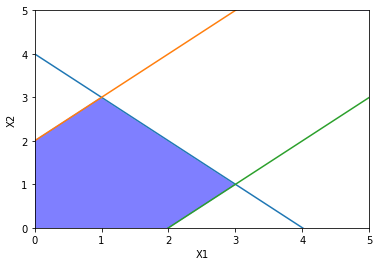

All basic solutions:


[{'Iteration': 2, 'x1': array([3.]), 'x2': array([1.]), 'x4': array([4.])},
 {'Iteration': 3, 'x1': array([1.]), 'x2': array([3.]), 'x5': array([4.])},
 {'Iteration': 4, 'x1': array([2.]), 'x3': array([2.]), 'x4': array([4.])},
 {'Iteration': 5, 'x1': array([-2.]), 'x3': array([6.]), 'x5': array([4.])},
 {'Iteration': 6, 'x1': array([4.]), 'x4': array([6.]), 'x5': array([-2.])},
 {'Iteration': 7, 'x2': array([-2.]), 'x3': array([6.]), 'x4': array([4.])},
 {'Iteration': 8, 'x2': array([2.]), 'x3': array([2.]), 'x5': array([4.])},
 {'Iteration': 9, 'x2': array([4.]), 'x4': array([-2.]), 'x5': array([6.])},
 {'Iteration': 10, 'x3': array([4.]), 'x4': array([2.]), 'x5': array([2.])}]

In [133]:
x = np.linspace(0, 5, 100)
b0 = np.zeros(len(x))
b1 = 4-x
b2 = 2+x
b3 = x-2

plt.plot(x, b1)
plt.plot(x, b2)
plt.plot(x, b3)
plt.xlim((0, 5))
plt.ylim((0, 5))
plt.xlabel('X1')
plt.ylabel('X2')

plt.fill_between(x, b3, b2, interpolate=True, color='blue', alpha=0.5)
plt.fill_between(x, b1, 5, color='white')
plt.plot(aspect='equal')
plt.show()

print(f'All basic solutions:')
all_basic_solutions

We can see the feasible region plotted above, along with the non-zero variables of each basic solution. The variables are labeled by iteration. 

The basic matrix from each iteration is shown in the extended output above, and was not reproduced here to keep the output from being too cluttered. 

Going through each iteration:

> 2: **YES - This is feasible** since (3, 1) is within the feasible region and all basic variables are $\geq$ 0.

> 3: **YES - This is feasible** since (1, 3) is within the feasible region and all basic variables are $\geq$ 0.

> 4: **YES - This is feasible** since (2, 2) is within the feasible region and all basic variables are $\geq$ 0.

> 5: **NO - This is not feasible** since $x_1$ is negative.

> 6: **NO - This is not feasible** since $x_5$ is negative.

> 7: **NO - This is not feasible** since $x_2$ is negative.

> 8: **YES - This is feasible** since (0, 0) is within the feasible region and all basic variables are $\geq$ 0.

> 9: **NO - This is not feasible** since $x_4$ is negative.

> 10: **YES - This is feasible** since (0, 0) is within the feasible region and all basic variables are $\geq$ 0.
